In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
from scipy.stats import norm

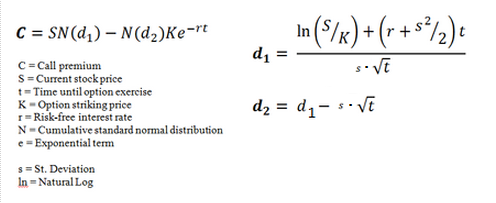

In [29]:
#Difference between d1 and d2 is a minus sign

def d1(S, K, r, stdev, T):
    return (np.log(S / K) + (r + stdev ** 2 / 2) * T) / (stdev * np.sqrt(T))
    
def d2(S, K, r, stdev, T):
    return (np.log( S / K) + (r - stdev ** 2 / 2) * T) / (stdev * np.sqrt(T))

In [16]:
norm.cdf(0) #CDF- Cumulative Distriubtion Function- Shows how the data accumulates in time
#Output can never be below 0, or above 1

0.5

In [17]:
norm.cdf(0.25)

0.5987063256829237

In [18]:
norm.cdf(0.75)

0.7733726476231317

In [19]:
norm.cdf(9)

1.0

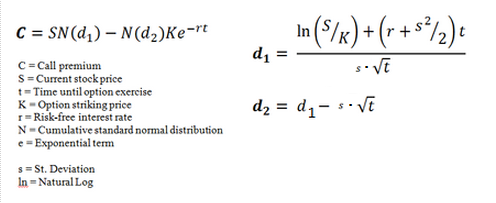

In [20]:
#Black Scholes Formula in code
def BSM(S, K, r, stdev, T):
    return (S * norm.cdf(d1(S, K, r, stdev, T))) - (K * np.exp(-r * T) * norm.cdf(d2(S, K, r, stdev, T)))

In [33]:
ticker = 'PG'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start = '2007-1-1', end = '2017-3-21')['Adj Close']

In [34]:
S = data.iloc[-1] #We need the previous date stock price in order to calculate present
S

PG    85.415619
Name: 2017-03-21 00:00:00, dtype: float64

In [35]:
log_returns = np.log(1 + data.pct_change())

In [36]:
stdev = log_returns.std() * 250 ** 0.5
stdev

PG    0.176551
dtype: float64

In [37]:
r = 0.025
K = 110.0
T = 1

In [38]:
d1(S, K, r, stdev, T)

PG   -1.202864
dtype: float64

In [39]:
d2(S, K, r, stdev, T)

PG   -1.379415
dtype: float64

In [40]:
BSM(S, K, r, stdev, T)

#Price of call option is $1.23

PG    0.781962
Name: 2017-03-21 00:00:00, dtype: float64